In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split as tts

from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs

from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve, classification_report, roc_curve
from sklearn.inspection import DecisionBoundaryDisplay
from mlxtend.plotting import plot_decision_regions

Data Pre-processing

In [ ]:
data=pd.read_csv('creditcard.csv')
data.head(), len(data)

(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V26      

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
data['Amount'].value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: Amount, Length: 32767, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='count'>

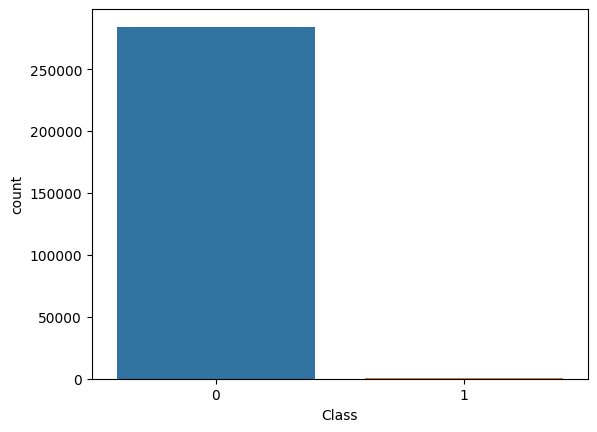

In [ ]:
sns.countplot(data=data,x='Class')

Text(0.5, 1.0, 'Time Distribution')

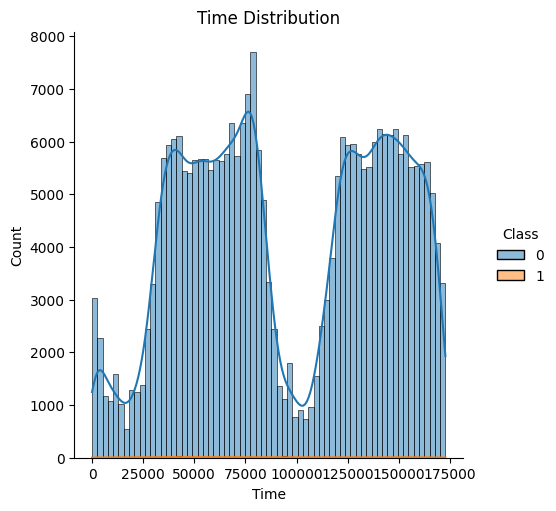

In [ ]:
sns.displot(data=data, x='Time',hue='Class',kde=True,multiple="stack")
plt.title('Time Distribution')

Text(0.5, 1.0, 'Amount Distribution')

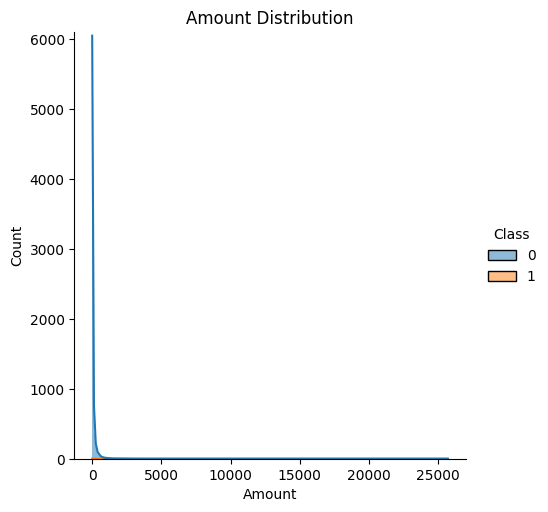

In [ ]:
sns.displot(data=data, x='Amount',hue='Class',kde=True,multiple="stack")
plt.ylim(0,6100)
plt.title('Amount Distribution')

In [ ]:
rob_scale = RobustScaler()

data['scaled_amount']=rob_scale.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_Time']=rob_scale.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Amount','Time'], axis=1,inplace=True)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [ ]:
def SMote(df,classname):
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    oversampled_X, oversampled_Y = sm.fit_resample(df.drop(classname, axis=1), df[classname])
    oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
    return oversampled

In [ ]:
data1=SMote(data,'Class')
data1.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_Time
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960


In [ ]:
data1['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

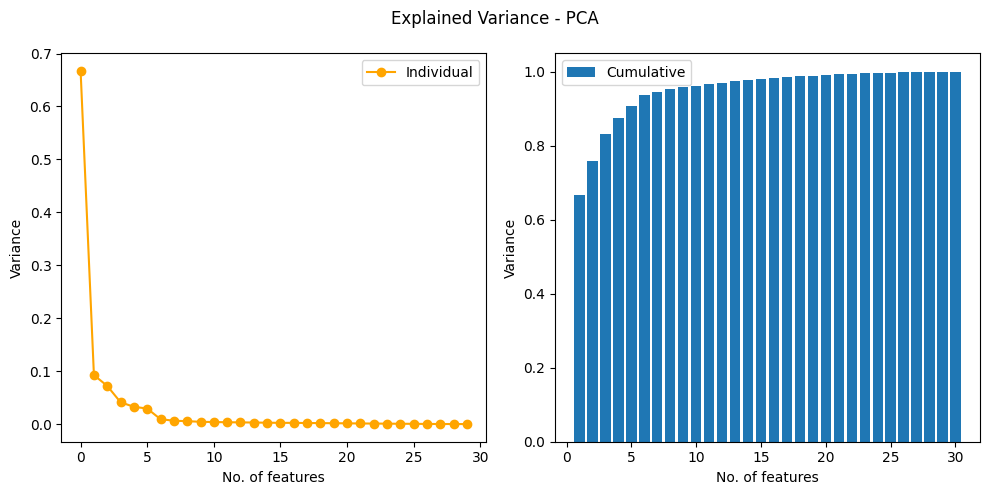

In [ ]:
X=data1.drop(columns=['Class']).to_numpy()
y=data1['Class'].to_numpy()

pca=PCA()
pca.fit(X)

plt.figure(figsize=((10,5)))
plt.subplot(1,2,1)
plt.plot(pca.explained_variance_ratio_, 'o-',label='Individual', color='orange',)
plt.suptitle('Explained Variance - PCA')
plt.ylabel('Variance')
plt.xlabel('No. of features')
plt.legend()
plt.tight_layout()
plt.subplot(1,2,2)
plt.bar(x=np.arange(1,31),height=np.cumsum(pca.explained_variance_ratio_),label='Cumulative')
plt.legend()
plt.ylabel('Variance')
plt.xlabel('No. of features')
plt.tight_layout()
plt.show()

In [ ]:
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X)

In [ ]:
x_train_val,x_test,y_train_val,y_test=tts(X,y,test_size=0.2)
x_train,x_val,y_train,y_val=tts(x_train_val,y_train_val,test_size=0.125)

x_train_val_pca,x_test_pca,y_train_val_pca,y_test_pca=tts(X,y,test_size=0.8)
x_train_pca,x_val_pca,y_train_pca,y_val_pca=tts(x_train_val_pca,y_train_val_pca,test_size=0.125)

Model Preparation

In [ ]:
cv = KFold(n_splits=5,shuffle=True)
def cvs_5_fold(clf, classifier_name_text):
    scores1 = cvs(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    for i in range(5):
        print(f'Accuracy of {classifier_name_text} on augmented data for set {i+1}: {scores1[i]*100}%')
        plt.text(i+0.6,scores1[i]*1.01,f'{scores1[i]:.3f}')
    print(f'Overall accuracy of {classifier_name_text} on augmented data: {np.mean(scores1)*100}%\n')
    scores2 = cvs(clf, X_pca, y, scoring='accuracy', cv=cv, n_jobs=-1)
    for i in range(5):
        print(f'Accuracy of {classifier_name_text} on augmented and reduced(PCA) data for set {i+1}: {scores2[i]*100}%')
        plt.text(i+1,scores2[i]*1.01,f'{scores2[i]:.3f}')
    print(f'Overall accuracy of {classifier_name_text} on augmented and reduced(PCA) data: {np.mean(scores2)*100}%')
    x=np.array([1,2,3,4,5])
    plt.bar(x-0.2,scores1,0.4,label='No-PCA')
    plt.bar(x+0.2,scores2,0.4,label='PCA')
    plt.title(f'5-fold Cross Validation for {classifier_name_text}')
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.ylabel('Accuracy')
    plt.show()

In [4]:
df = pd.read_csv("C:\\Users\\soham\Downloads\\archive\\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
X = df.drop('Class', axis=1)
y = df["Class"]

In [6]:
X_train, X_test, y_train, y_test = tts(X, y ,test_size=0.3)
X_val, X_test, y_val, y_test = tts(X_test, y_test ,test_size = 0.66)

In [7]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
214126,139543.0,-3.041634,3.340686,-2.278140,-1.744321,0.059041,-1.793066,1.043729,0.284280,1.679434,...,1.289545,-0.017934,0.652868,-0.026528,0.036370,0.235886,0.124264,1.510512,0.916465,0.76
104997,69322.0,1.547130,-1.143601,0.599680,-1.425964,-1.694814,-0.555910,-1.347444,-0.046016,-1.393924,...,-0.389396,-0.110397,0.063743,-0.042561,-0.153232,0.372241,-0.067729,0.045524,0.018525,4.80
97547,66265.0,-1.414617,0.591800,1.909963,1.548295,0.358451,0.014235,-0.635295,-1.479684,-0.118283,...,-0.591853,1.253139,-0.792244,0.037442,0.404731,-0.523786,-0.517449,0.486302,0.097013,28.89
223292,143324.0,2.052549,-0.120998,-1.440842,0.186356,0.097594,-0.883149,0.089920,-0.189692,0.491035,...,-0.279838,0.265867,0.857929,-0.041773,-0.322505,0.251201,-0.105383,-0.029571,-0.073894,1.79
131539,79638.0,-0.574888,0.647505,1.360964,-0.533827,0.626150,-0.462558,0.653991,0.044264,-0.382291,...,-0.103334,-0.114981,-0.442822,0.062540,-0.310911,-0.562442,-0.076265,0.094369,0.145705,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84924,60519.0,-2.728180,2.146682,0.498205,1.053374,-0.631301,-0.324433,0.290786,0.332811,1.489076,...,0.568915,-0.288777,0.084453,0.007569,0.333398,0.058222,-0.324600,-0.124893,-0.091840,9.46
239367,150073.0,-3.821324,2.974474,-2.185257,-1.131084,-0.806453,-1.045804,-0.303852,1.346381,1.446745,...,0.815403,-0.524641,-0.843376,0.268197,-0.387884,0.160269,0.203814,1.014996,0.737546,11.99
49994,44296.0,1.159447,0.316383,0.653097,1.037492,-0.411949,-0.677035,0.044757,-0.061131,-0.282996,...,-0.100512,-0.157151,-0.493765,0.105500,0.495255,0.320895,-0.662319,0.022131,0.023471,9.99
105058,69347.0,0.167824,0.928797,0.854182,0.704331,-0.087860,-0.940810,0.513984,-0.120058,-0.327521,...,-0.021224,-0.101013,-0.265481,0.262027,0.323562,-1.537460,0.005076,0.239740,0.260188,1.79


In [8]:
X_test.to_numpy()[:,0]

array([139543.,  69322.,  66265., ...,  44296.,  69347.,  74437.])

In [26]:
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve, classification_report, roc_curve

def print_report(model, X_t, y_t, y_p):
    #normal confusion matrix
    # print(f'Confusion Matrix: \n {confusion_matrix(y_t, y_p)}')
    
    #confusion matrix as a heatmap
    cm=(confusion_matrix(y_t, y_p))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f'Confusion Matrix for {model}'); 
    ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud ', 'Fraud']);
    plt.show()
    
    print(f'Classification Report: \n {classification_report(y_t, y_p)}')
    
    print(f'Accuracy  :{accuracy_score(y_t, y_p):.2f}' )
    
    print(f'Balanced  :{balanced_accuracy_score(y_t, y_p):.2f}' )
    
    print(f'F1 Score        :{f1_score(y_t, y_p):.2f}' )
    
    print(f'Precision :{precision_score(y_t, y_p):.2f}' )
    
    print(f'Recall    :{recall_score(y_t, y_p):.2f}' )
    
    print(f'ROC-AUC-Score  :{roc_auc_score(y_t, y_p):.2f}' )
    
    print(f'Precision Score  :{average_precision_score(y_t, y_p):.2f}' )
    
    #AUPCR 
    y_proba = model.predict_proba(X_t)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_t, y_proba)
    
    aupcr = auc(recall, precision)
    
    print(f'AUPCR: {aupcr}')
    plt.plot(recall, precision, label=f"AUPCR={aupcr:.2f}")
    plt.fill_between(recall, precision, alpha=0.2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {model}")
    plt.legend()
    plt.show()
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_t, y_proba)

    # Calculate AUC value
    auc_val = auc(fpr, tpr)
    
    print(f'AUC: {auc_val}')

    # Plot the ROC curve with AUC value
    plt.plot(fpr, tpr, label=f"AUC={auc_val:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model}")
    plt.legend()
    plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc = rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

y_pred = rfc.predict(X_test)

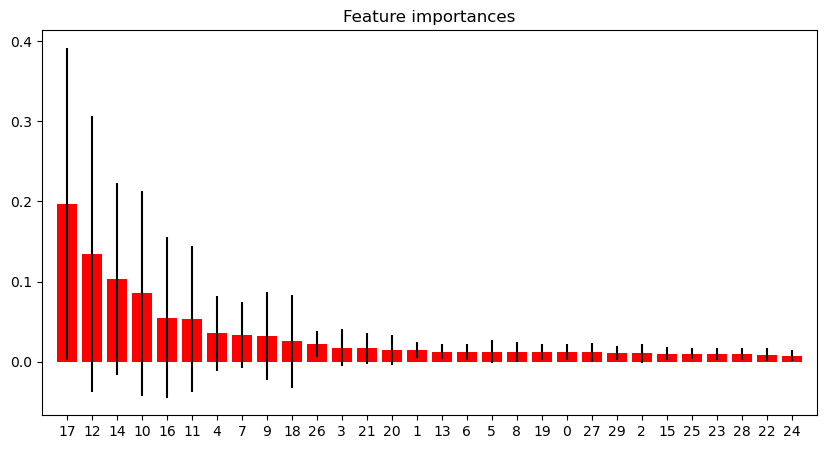

In [11]:
# Get feature importances
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10,5))
plt.title("Feature importances of Random Forest Classifier")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'responsemethod'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


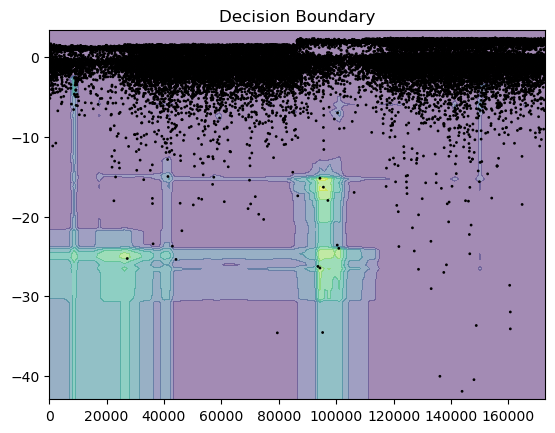

In [18]:
X_db = X_test.to_numpy()[:, :2]
classifier = RandomForestClassifier().fit(X_db, y_test)

disp=DecisionBoundaryDisplay.from_estimator(classifier, X_db, responsemethod="predict",xlabel='', ylabel='',alpha=0.5,)
disp.ax_.scatter(X_test.to_numpy()[:,0],X_test.to_numpy()[:,1], c= y_test, edgecolor="k", s = 1)
disp.ax_.set_title("Decision Boundary")
plt.show()

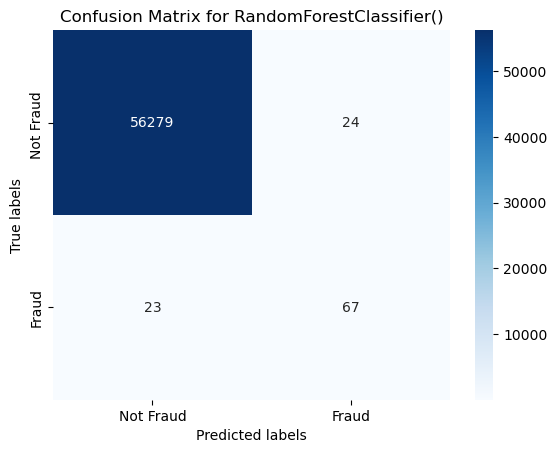

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56303
           1       0.74      0.74      0.74        90

    accuracy                           1.00     56393
   macro avg       0.87      0.87      0.87     56393
weighted avg       1.00      1.00      1.00     56393

Accuracy  :1.00
Balanced  :0.87
F1 Score        :0.74
Precision :0.74
Recall    :0.74
ROC-AUC-Score  :0.87
Precision Score  :0.55
AUPCR: 0.8610100694063252


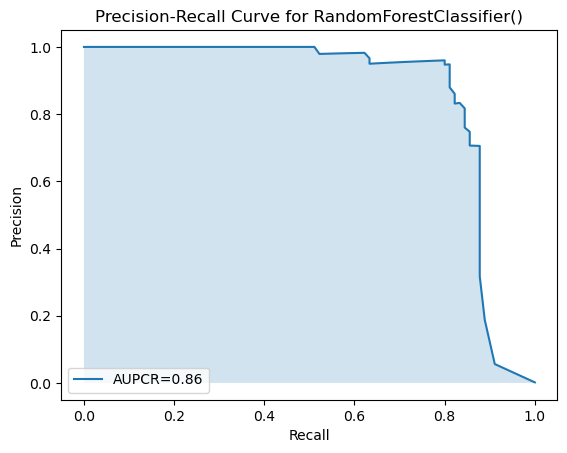

AUC: 0.9540387624894666


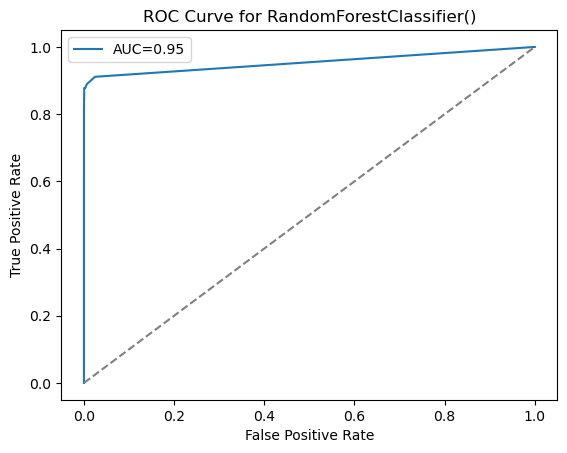

In [27]:
print_report(rfc, X_test, y_test, y_pred)

In [19]:
import xgboost

In [20]:
xgb = xgboost.XGBClassifier(subsample=0.7)

xgb.fit(X_train,y_train)

y_xgb_pred = xgb.predict(X_test)

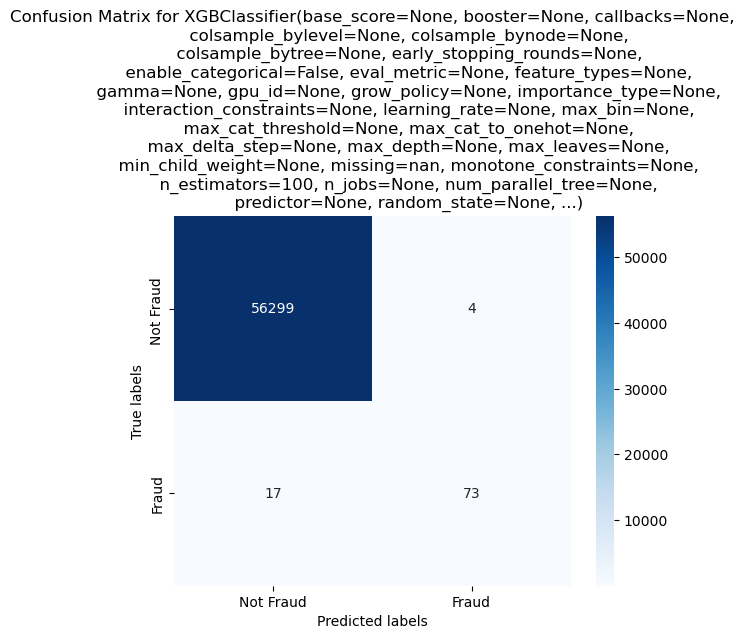

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56303
           1       0.95      0.81      0.87        90

    accuracy                           1.00     56393
   macro avg       0.97      0.91      0.94     56393
weighted avg       1.00      1.00      1.00     56393

Accuracy  :1.00
Balanced  :0.91
F1 Score        :0.87
Precision :0.95
Recall    :0.81
ROC-AUC-Score  :0.91
Precision Score  :0.77
AUPCR: 0.867015472062395


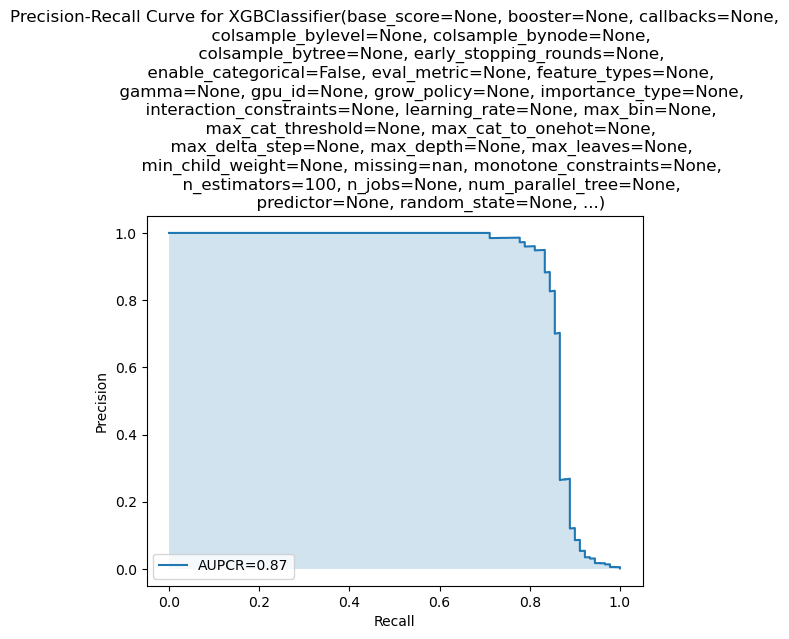

AUC: 0.9888701411213533


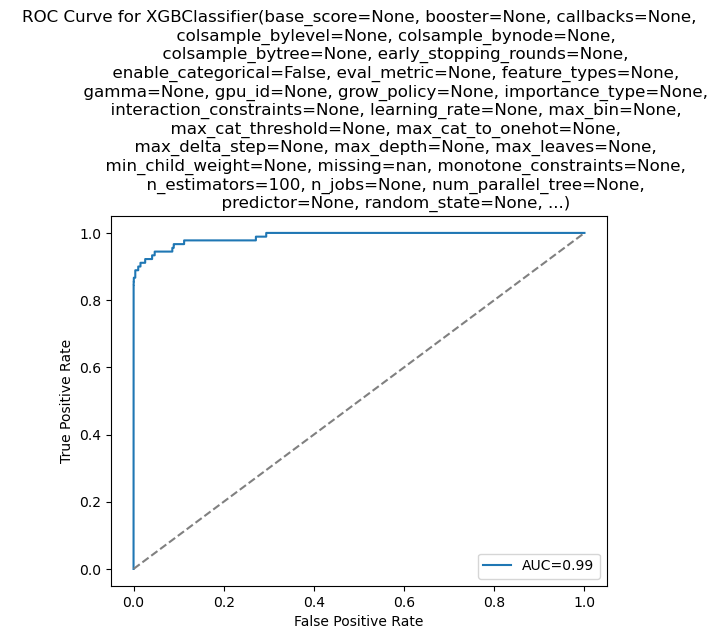

In [28]:
print_report(xgb, X_test, y_test, y_xgb_pred)

<Figure size 1000x500 with 0 Axes>

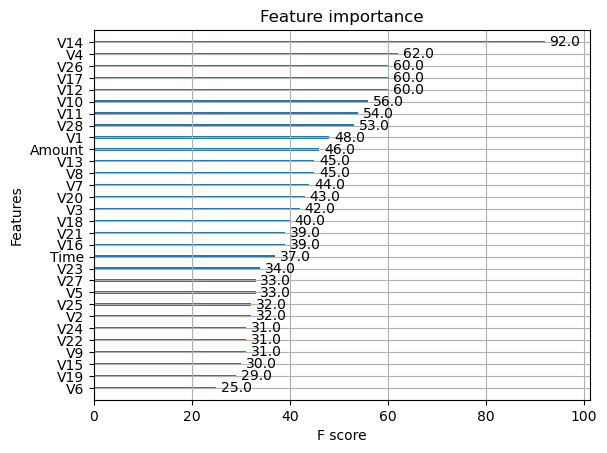

In [22]:
# Plot feature importance
plt.figure(figsize=(10,5))
xgboost.plot_importance(xgb)
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


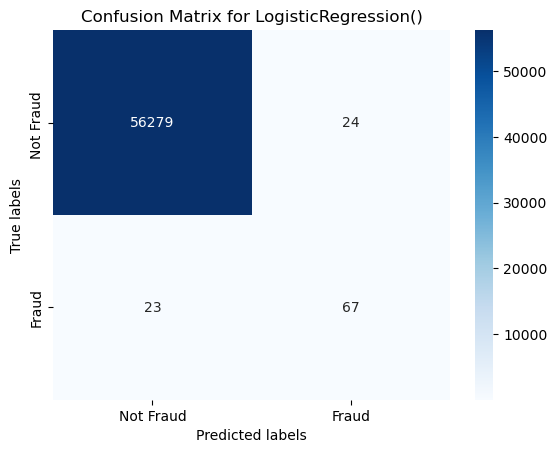

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56303
           1       0.74      0.74      0.74        90

    accuracy                           1.00     56393
   macro avg       0.87      0.87      0.87     56393
weighted avg       1.00      1.00      1.00     56393

Accuracy  :1.00
Balanced  :0.87
F1 Score        :0.74
Precision :0.74
Recall    :0.74
ROC-AUC-Score  :0.87
Precision Score  :0.55
AUPCR: 0.6159258797747537


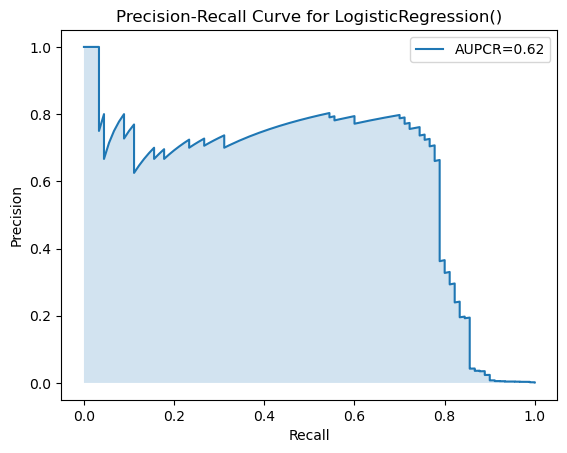

AUC: 0.9570328796373591


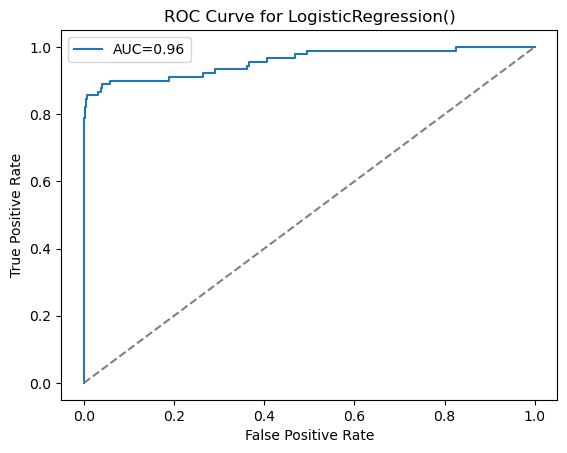

In [29]:
print_report(lr, X_test, y_test, y_pred)

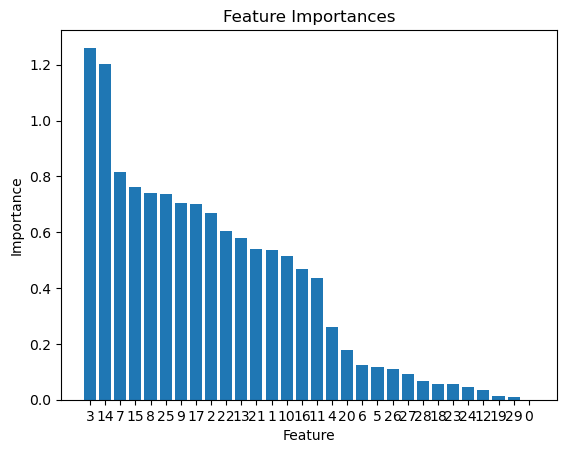

In [30]:
# Get feature importances
importances = np.abs(lr.coef_)[0]
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), indices)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()